<a href="https://colab.research.google.com/github/wafa17/Data-Mining/blob/main/Data_Mining_Klasifikasi_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 100

# **IMPORT DATA**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv


In [5]:
df = pd.read_csv('adult.csv')
df.shape

(32561, 15)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,listing-of-atributes
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.dtypes

age                       int64
 workclass               object
 fnlwgt                   int64
 education               object
 education-num            int64
 martial-status          object
 occupation              object
 relationship            object
 race                    object
 sex                     object
 capital-gain             int64
 capital-loss             int64
 hours-per-week           int64
 native-country          object
 listing-of-atributes    object
dtype: object

# **PREPROSESS DATA**

**Missing Value**

---

1. Menghapus colom capital-gain dan capital loss karena terlau banyak missing value sehingga data tidak berkualitas
2. Mengganti value '?' menjadi nan/null dan kemudian dihapus


In [8]:
#drop kolom capital-gain karena terlalu banyak missing value sehingga data tidak berkualitas
del df[' capital-gain']

In [9]:
#delete/drop colom capital-loss karena terlalu banyak missing value sehingga data tidak berkualitas
del df[' capital-loss']

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,hours-per-week,native-country,listing-of-atributes
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [11]:
#mengganti value '?' pada dataset menjadi nan/null dan kemudian menghapus data tersebut
df = df.replace(' ?', np.nan).dropna()
df.shape

(30162, 13)

In [12]:
df.isnull().sum() #cek missing value pada data

age                      0
 workclass               0
 fnlwgt                  0
 education               0
 education-num           0
 martial-status          0
 occupation              0
 relationship            0
 race                    0
 sex                     0
 hours-per-week          0
 native-country          0
 listing-of-atributes    0
dtype: int64

**Encode Object into int**

---

Mengubah datatype yang semula adalah object menjadi integer

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df[' workclass'] = encoder.fit_transform(df[' workclass'])
df[' education'] = encoder.fit_transform(df[' education'])
df[' martial-status'] = encoder.fit_transform(df[' martial-status'])
df[' occupation'] = encoder.fit_transform(df[' occupation'])
df[' relationship'] = encoder.fit_transform(df[' relationship'])
df[' race'] = encoder.fit_transform(df[' race'])
df[' sex'] = encoder.fit_transform(df[' sex'])
df[' native-country'] = encoder.fit_transform(df[' native-country'])
df[' listing-of-atributes'] = encoder.fit_transform(df[' listing-of-atributes'])

In [15]:
df.dtypes

age                      int64
 workclass               int64
 fnlwgt                  int64
 education               int64
 education-num           int64
 martial-status          int64
 occupation              int64
 relationship            int64
 race                    int64
 sex                     int64
 hours-per-week          int64
 native-country          int64
 listing-of-atributes    int64
dtype: object

In [16]:
df.head()

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,hours-per-week,native-country,listing-of-atributes
0,39,5,77516,9,13,4,0,1,4,1,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,40,4,0


**Feature Sellection**

---

Memilih atribut yang memiliki korelasi tinggi dan menghapus atribut dengan korelasi rendah dengan menggunakan metode HeatMap

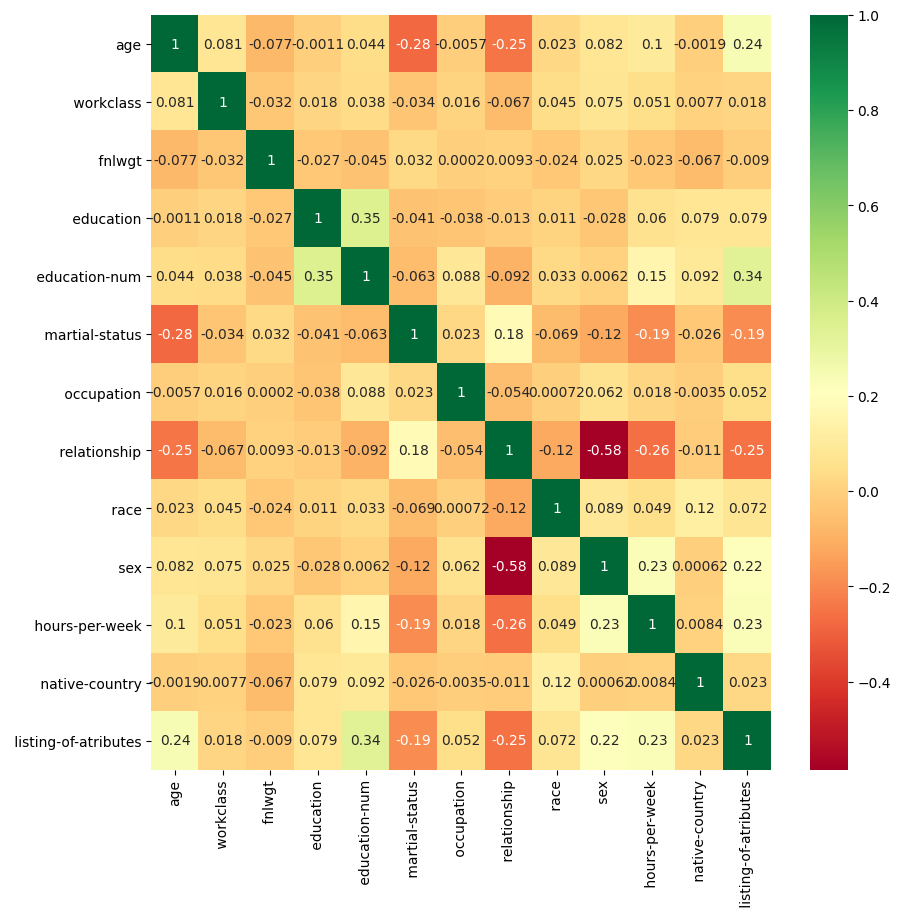

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

X = df.iloc[:,0:20]  
y = df.iloc[:,-1]    
# mendapatkan korelasi antar kolomnya
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
#drop data yang memiliki korelasi paling rendah
data = df.drop([' martial-status',' relationship',' sex',' hours-per-week',' listing-of-atributes'], axis = 1)

In [19]:
data.head() #data yang akan digunakan untuk klasifikasi

,age,workclass,fnlwgt,education,education-num,occupation,race,native-country
0,39,5,77516,9,13,0,4,38
1,50,4,83311,9,13,3,4,38
2,38,2,215646,11,9,5,4,38
3,53,2,234721,1,7,5,2,38
4,28,2,338409,9,13,9,2,4


Jika dilihat dari hasil korelasi antar fitur dibawah, *korelasinya sangat rendah* yaitu korelasi yang hampir mendekati angka 0. hanya terdapat 2 fitur yang dnegan nilai korelasi di angka 0.35 yaitu education dan education-num. 

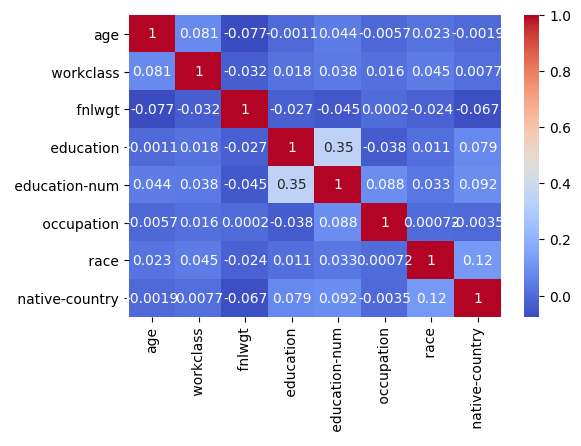

In [20]:
# Korelasi antar fitur, dapat terlihat pada heatmap dibawah. Nilai korelasi yang mendekati angka satu berarti fitur memiliki korelasi yang baik
datset = data.select_dtypes(include = ['int64',]).iloc[:, :].corr()
sns.heatmap(datset, annot = True, cmap = 'coolwarm')
plt.show()

In [21]:
datset #menampilkan korelasi dalam bentuk tabel 

,age,workclass,fnlwgt,education,education-num,occupation,race,native-country
age,1.000000,0.080540,-0.076511,-0.001111,0.043526,-0.005682,0.023374,-0.001905
workclass,0.080540,1.000000,-0.032493,0.017855,0.037833,0.015572,0.044731,0.007668
fnlwgt,-0.076511,-0.032493,1.000000,-0.027102,-0.044992,0.000204,-0.023895,-0.066717
education,-0.001111,0.017855,-0.027102,1.000000,0.345410,-0.038212,0.011154,0.078790
education-num,0.043526,0.037833,-0.044992,0.345410,1.000000,0.087717,0.032805,0.091555
occupation,-0.005682,0.015572,0.000204,-0.038212,0.087717,1.000000,0.000717,-0.003483
race,0.023374,0.044731,-0.023895,0.011154,0.032805,0.000717,1.000000,0.124514
native-country,-0.001905,0.007668,-0.066717,0.078790,0.091555,-0.003483,0.124514,1.000000


**Split Data**

---

Akan dilakukan split data menjadi data train dan data test. Pembagian dilakukan dengan rasio 80% untuk data train dan 20% untuk data test

In [22]:
#drop fitur international_reputation karena akan digunakan sebagai label
x = data.drop([' workclass'], axis=1)
x.head()

,age,fnlwgt,education,education-num,occupation,race,native-country
0,39,77516,9,13,0,4,38
1,50,83311,9,13,3,4,38
2,38,215646,11,9,5,4,38
3,53,234721,1,7,5,2,38
4,28,338409,9,13,9,2,4


In [23]:
#fitur international_reputation menjadi label yang digunakan untuk klasifikasi.
y = data[' workclass']
y.head()

0    5
1    4
2    2
3    2
4    2
Name:  workclass, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [26]:
# scaler digunakan untuk scalling data karena adanya perbedaan rentang data.
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# **CLASSIFICATION**

---

Metode Klasifikasi yang digunakan adalah Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(x_train, y_train)
nbtrain.class_count_

array([7.5700e+02, 1.6850e+03, 1.7803e+04, 8.7100e+02, 1.9910e+03,
       1.0130e+03, 9.0000e+00])

In [29]:
y_pred = nbtrain.predict(x_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [30]:
# Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(x_test)

array([[5.79623095e-02, 5.48090154e-02, 6.76628187e-01, ...,
        1.15803373e-01, 4.51994220e-02, 4.03341433e-04],
       [4.90925372e-02, 7.25894028e-02, 5.04236362e-01, ...,
        2.24538089e-01, 4.07355185e-02, 2.12583786e-03],
       [2.37368506e-02, 6.34854783e-02, 7.55142497e-01, ...,
        8.34912798e-02, 3.88817972e-02, 4.38191833e-04],
       ...,
       [3.50956896e-02, 5.35900934e-02, 7.59829399e-01, ...,
        8.08667171e-02, 3.78553085e-02, 8.90902606e-04],
       [1.31083853e-02, 7.68434415e-02, 7.98556430e-01, ...,
        4.80304860e-02, 3.78388449e-02, 7.26150798e-05],
       [5.14214399e-02, 7.59322061e-02, 6.15218189e-01, ...,
        1.45777479e-01, 3.83619334e-02, 3.92993024e-03]])

In [31]:
# Menampilkan confussion matriks untuk naive bayes 
confusion_matrix(y_test, y_pred)

array([[   5,    0,  179,    0,    2,    0,    0],
       [   9,    0,  369,    0,    4,    0,    0],
       [  43,    3, 4422,    3,   11,    0,    1],
       [   3,    1,  194,    0,    5,    0,    0],
       [   9,    0,  485,    4,   10,    0,    0],
       [   6,    0,  257,    1,    1,    1,    0],
       [   0,    0,    5,    0,    0,    0,    0]])

In [32]:
# Menampilkan klasifikasi, precision,recall, f1 score, support dan accuracy dengannaive bayes
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.07      0.03      0.04       186
           1       0.00      0.00      0.00       382
           2       0.75      0.99      0.85      4483
           3       0.00      0.00      0.00       203
           4       0.30      0.02      0.04       508
           5       1.00      0.00      0.01       266
           6       0.00      0.00      0.00         5

    accuracy                           0.74      6033
   macro avg       0.30      0.15      0.13      6033
weighted avg       0.63      0.74      0.64      6033



In [33]:
from sklearn.metrics import accuracy_score
accuracyNB= accuracy_score(y_test, y_pred)
accuracyNB #akurasi untuk naive bayes 

0.7356207525277639